In [36]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
#working in local machine
Data_PATH = r"..\data\processed\onehot_2.pkl"
#working in codespace
# Data_PATH = r"/workspaces/stackoverflowDeveloper/data/processed/onehot_2.pkl"

EXPORT_PATH = r"..\data\processed\onehot_2.pkl"

TECH_COL = ["MiscTechWorkedWith", "NEWCollabToolsWorkedWith", "DatabaseWorkedWith", "WebframeWorkedWith", "LanguageWorkedWith", "PlatformWorkedWith"]
JOB_COL = "DevType"
COL_READ = TECH_COL +[JOB_COL]

# Load the data

In [3]:
df = pd.read_pickle(Data_PATH)
df.head()

MiscTechWorkedWith                                                      \
                .NET .NET Core Ansible Apache Spark Chef Cordova Flutter   
0                  1         1       0            0    0       0       0   
1                  0         0       0            0    0       0       0   
2                  0         0       0            0    0       0       0   
3                  0         0       0            0    0       0       0   
4                  0         0       1            0    0       0       0   

                        ...           DevType                          \
  Hadoop Keras Node.js  ... Developer, mobile Educator Engineer, data   
0      0     0       0  ...                 0        0              0   
1      0     0       0  ...                 1        0              0   
2      0     0       0  ...                 0        0              0   
3      0     0       0  ...                 0        0              0   
4      0     0       0  ...                 0        0              0   

                                                  \
  Engineer, site reliability Engineering manager   
0                          0                   0   
1                          0                   0   
2                          0                   0   
3                          0                   0   
4                          0                   0   

                                                             \
  Marketing or sales professional Product manager Scientist   
0                               0               0         0   
1                               0               0         0   
2                               0               0         0   
3                               0               0         0   
4                               0               0         0   

                                            
  Senior executive/VP System administrator  
0                   0                    0  
1                   0                    0  
2                   0                    0  
3                   0                    0  
4                   0                    0  

[5 rows x 124 columns]

In [19]:
def get_skills_names(dataFrame):
    #Make a skills list 
    skills = []
    job_mask = dataFrame[("DevType", "Educator")]==1  #Educator or any job as all jobs has the same columns
    for tech_col in TECH_COL:
        skills = skills + list(dataFrame.loc[job_mask][tech_col].columns)

    return skills

skills = get_skills_names(df)
skills[:10]

['.NET',
 '.NET Core',
 'Ansible',
 'Apache Spark',
 'Chef',
 'Cordova',
 'Flutter',
 'Hadoop',
 'Keras',
 'Node.js']

In [20]:
jobs = list(df["DevType"].columns)
jobs[:10]

['Academic researcher',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'DevOps specialist',
 'Developer, QA or test',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, embedded applications or devices']

In [47]:
df_skills = df.copy().drop("DevType",axis=1)
df_skills_scaled = StandardScaler().fit_transform(df_skills)
df_skills_scaled

array([[ 1.88612836,  2.23463294, -0.21918963, ...,  1.11994429,
        -0.36706528, -0.33665307],
       [-0.53018661, -0.44750079, -0.21918963, ..., -0.89290155,
        -0.36706528,  2.97041698],
       [-0.53018661, -0.44750079, -0.21918963, ..., -0.89290155,
        -0.36706528, -0.33665307],
       ...,
       [-0.53018661, -0.44750079, -0.21918963, ..., -0.89290155,
        -0.36706528, -0.33665307],
       [-0.53018661, -0.44750079, -0.21918963, ...,  1.11994429,
        -0.36706528, -0.33665307],
       [ 1.88612836,  2.23463294, -0.21918963, ...,  1.11994429,
        -0.36706528, -0.33665307]])

In [48]:
df_skills_scaled.shape

(64461, 101)

In [50]:
tsne = TSNE(n_components=2,max_iter=10**10,init="pca",learning_rate=0.01)
skills_tsne = tsne.fit_transform(df_skills_scaled.T)

In [51]:
skills_tsne.shape

(101, 2)

In [52]:
df_skills_tsne = pd.DataFrame(skills_tsne, index=df_skills.columns,columns=["x","y"])
df_skills_tsne.head()

x             y
MiscTechWorkedWith .NET         -1.333270e-07 -8.051239e-07
                   .NET Core    -1.333264e-07 -8.051224e-07
                   Ansible      -1.332710e-07 -8.050703e-07
                   Apache Spark -1.332732e-07 -8.050758e-07
                   Chef         -1.332725e-07 -8.050734e-07

<AxesSubplot: xlabel='x', ylabel='y'>

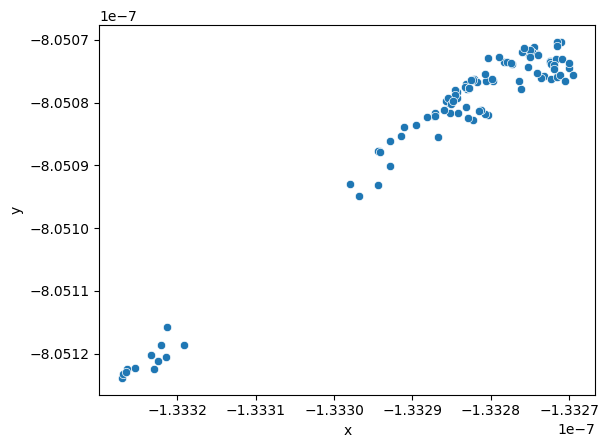

In [53]:
sns.scatterplot(x=df_skills_tsne["x"], y=df_skills_tsne["y"])